# LSTM - Univariate - Model - 7 Day - Forecast - Phase - II

In [326]:
import pandas as pd

df_combined_new = pd.read_csv("../../data/baseline_training_food_page1.csv")
df_combined_new.head()

,date,items,pettah_average,pettah_min_value,pettah_max_value,food_inflation_Base_2013,percipitation,Bankrupt,pettah_range,pettah_midpoint
0,6/22/2015,Pulses (Rs/Kg)_Green Gram,194.6,190.0,200,110.2,1.12,0,10.0,195.0
1,6/22/2015,Pulses (Rs/Kg)_Red Dhal,177.6,168.0,186,110.2,1.12,0,18.0,177.0
2,6/22/2015,Potatoes (Rs/Kg)_Nuwaraeliya,134.0,130.0,140,110.2,1.12,0,10.0,135.0
3,6/22/2015,Onion (Rs/Kg)_Vedalan,134.0,130.0,140,110.2,1.12,0,10.0,135.0
4,6/22/2015,Pulses (Rs/Kg)_Cowpea,202.0,180.0,210,110.2,1.12,0,30.0,195.0


## Train and Test Set Date Range ( 2019-05-31 ---- 2024-05-31)

In [327]:
import pandas as pd

# date column in datetime format
df_combined_new['date'] = pd.to_datetime(df_combined_new['date'])
# Filter the DataFrame
filtered_df = df_combined_new[
    (df_combined_new['items'] == "Rice (Rs/kg)_Nadu 2") &
    (df_combined_new['date'] >= '2019-05-31') &
    (df_combined_new['date'] <= '2024-05-31')
]
filtered_df.head()

,date,items,pettah_average,pettah_min_value,pettah_max_value,food_inflation_Base_2013,percipitation,Bankrupt,pettah_range,pettah_midpoint
8525,2019-05-31,Rice (Rs/kg)_Nadu 2,84.0,83.0,85,131.1,0.84,0,2.0,84.0
8534,2019-06-03,Rice (Rs/kg)_Nadu 2,84.0,83.0,85,134.5,9.28,0,2.0,84.0
8541,2019-06-06,Rice (Rs/kg)_Nadu 2,82.0,78.0,83,134.5,4.34,0,5.0,80.5
8550,2019-06-07,Rice (Rs/kg)_Nadu 2,81.0,78.0,84,134.5,19.28,0,6.0,81.0
8560,2019-06-10,Rice (Rs/kg)_Nadu 2,80.8,78.0,83,134.5,6.50,0,5.0,80.5


In [328]:
filtered_df = filtered_df[filtered_df['date'] != '2023-08-16'] # Dropping one outlier

In [329]:
filtered_df.reset_index(drop=True, inplace=True)
filtered_df.head()

,date,items,pettah_average,pettah_min_value,pettah_max_value,food_inflation_Base_2013,percipitation,Bankrupt,pettah_range,pettah_midpoint
0,2019-05-31,Rice (Rs/kg)_Nadu 2,84.0,83.0,85,131.1,0.84,0,2.0,84.0
1,2019-06-03,Rice (Rs/kg)_Nadu 2,84.0,83.0,85,134.5,9.28,0,2.0,84.0
2,2019-06-06,Rice (Rs/kg)_Nadu 2,82.0,78.0,83,134.5,4.34,0,5.0,80.5
3,2019-06-07,Rice (Rs/kg)_Nadu 2,81.0,78.0,84,134.5,19.28,0,6.0,81.0
4,2019-06-10,Rice (Rs/kg)_Nadu 2,80.8,78.0,83,134.5,6.50,0,5.0,80.5


## Drop Duplicates

In [330]:
duplicates = filtered_df[filtered_df['date'].duplicated()]
duplicates

,date,items,pettah_average,pettah_min_value,pettah_max_value,food_inflation_Base_2013,percipitation,Bankrupt,pettah_range,pettah_midpoint
212,2020-07-17,Rice (Rs/kg)_Nadu 2,92.60,92.0,93,148.00,5.89,0,1.0,92.5
508,2022-03-15,Rice (Rs/kg)_Nadu 2,155.00,150.0,160,202.00,0.25,1,10.0,155.0
891,2024-01-03,Rice (Rs/kg)_Nadu 2,205.75,205.0,208,322.27,1.25,1,3.0,206.5


In [331]:
# Keep the first occurrence and drop the rest
filtered_df = filtered_df.drop_duplicates(subset=['date'], keep='first')

In [332]:
filtered_df.reset_index(drop=True, inplace=True)

## Reading Data Set Again from the Excel

In [333]:
filtered_df = pd.read_excel('../../data/Lstm_Dates.xlsx')
# Replace all missing values (NaN) in the 'items' column with 'Rice (Rs/kg)_Nadu 2'
filtered_df['items'] = filtered_df['items'].fillna('Rice (Rs/kg)_Nadu 2')
filtered_df.head(15)

,date,items,pettah_average,pettah_min_value,pettah_max_value,food_inflation_Base_2013,percipitation,Bankrupt,pettah_range,pettah_midpoint
0,2019-05-31,Rice (Rs/kg)_Nadu 2,84.0,83.0,85.0,131.1,0.84,0.0,2.0,84.0
1,2019-06-01,Rice (Rs/kg)_Nadu 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-06-02,Rice (Rs/kg)_Nadu 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-06-03,Rice (Rs/kg)_Nadu 2,84.0,83.0,85.0,134.5,9.28,0.0,2.0,84.0
4,2019-06-04,Rice (Rs/kg)_Nadu 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2019-06-05,Rice (Rs/kg)_Nadu 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2019-06-06,Rice (Rs/kg)_Nadu 2,82.0,78.0,83.0,134.5,4.34,0.0,5.0,80.5
7,2019-06-07,Rice (Rs/kg)_Nadu 2,81.0,78.0,84.0,134.5,19.28,0.0,6.0,81.0
8,2019-06-08,Rice (Rs/kg)_Nadu 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2019-06-09,Rice (Rs/kg)_Nadu 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Feature Engineering and Final Data Frame Creation

## Use Interpolation to Fill Missing Values

In [334]:
# Time-based interpolation (useful for datetime indices)
filtered_df['pettah_average'] = filtered_df['pettah_average'].interpolate(method='linear', limit_direction='both')

## Regime indicator 

In [335]:
# Ensure 'date' column is in datetime format
filtered_df['date'] = pd.to_datetime(filtered_df['date'])

# Set the date column as the index (if not already)
filtered_df.set_index('date', inplace=True)

# Initialize the 'regime' column with default value, assuming 0 for stable period
filtered_df['regime'] = 0

# Assign regime indicator values based on known economic periods
# Stable period: 2019 to the end of 2021
filtered_df.loc[(filtered_df.index >= '2019-01-01') & (filtered_df.index < '2022-01-01'), 'regime'] = 0

# Crisis period: 2022 to mid-2023
filtered_df.loc[(filtered_df.index >= '2022-01-01') & (filtered_df.index < '2023-07-01'), 'regime'] = 1

# Recovery period: mid-2023 onward
filtered_df.loc[filtered_df.index >= '2023-07-01', 'regime'] =2

filtered_df.head()

,items,pettah_average,pettah_min_value,pettah_max_value,food_inflation_Base_2013,percipitation,Bankrupt,pettah_range,pettah_midpoint,regime
date,,,,,,,,,,
2019-05-31,Rice (Rs/kg)_Nadu 2,84.000000,83.0,85.0,131.1,0.84,0.0,2.0,84.0,0
2019-06-01,Rice (Rs/kg)_Nadu 2,84.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2019-06-02,Rice (Rs/kg)_Nadu 2,84.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2019-06-03,Rice (Rs/kg)_Nadu 2,84.000000,83.0,85.0,134.5,9.28,0.0,2.0,84.0,0
2019-06-04,Rice (Rs/kg)_Nadu 2,83.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


## Plotting the Pettah Average Price

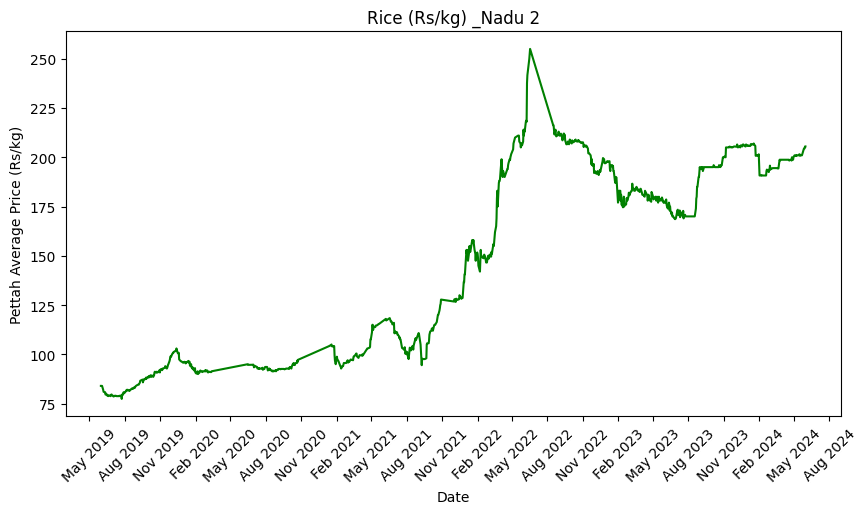

In [336]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Reset the index to make 'date' a regular column
filtered_df = filtered_df.reset_index()
# Ensure 'date' is a datetime object
filtered_df['date'] = pd.to_datetime(filtered_df['date'])

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 5))

# Plot pettah_average over time
sns.lineplot(data=filtered_df, x='date', y='pettah_average', ax=ax, color='green')

# Add titles and labels
ax.set_title('Rice (Rs/kg) _Nadu 2')
ax.set_xlabel('Date')
ax.set_ylabel('Pettah Average Price (Rs/kg)')

# Set x-axis format to show the month and year (e.g., Jan 2024)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Set the interval for x-axis ticks to every 3 months
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))

# Rotate date labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

## Drop Features 

In [337]:
# filtered_df.drop(columns=['items','percipitation', 'pettah_min_value', 'pettah_max_value', 'food_inflation_Base_2013', 'Bankrupt',
#                           'percipitation','pettah_range','pettah_midpoint','pettah_avg_sma_150','pettah_avg_sma_14','ema_7','ema_30'], inplace=True)

filtered_df.drop(columns=['items', 'pettah_min_value',
       'pettah_max_value', 'food_inflation_Base_2013', 'percipitation',
       'Bankrupt', 'pettah_range', 'pettah_midpoint', 'regime'], inplace=True)


In [338]:
print(filtered_df.columns)

Index(['date', 'pettah_average'], dtype='object')


## Time Series Decomposition - Additive Model

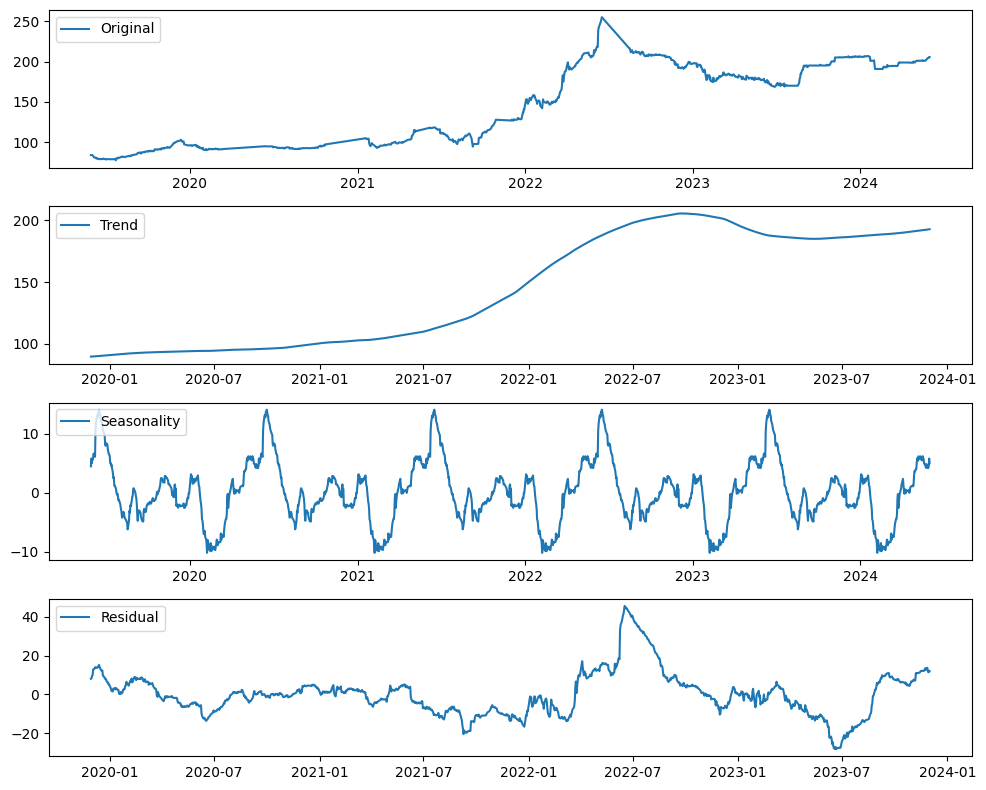

In [339]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

filtered_df['date'] = pd.to_datetime(filtered_df['date'])
filtered_df.set_index('date', inplace=True)

# Perform seasonal decomposition (additive model is often used for price data)
decomposition = seasonal_decompose(filtered_df['pettah_average'], model='additive', period=365)

# Plot the decomposed components
plt.figure(figsize=(10, 8))
plt.subplot(4, 1, 1)
plt.plot(filtered_df['pettah_average'], label='Original')
plt.legend(loc='upper left')

plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='upper left')

plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


## Check the Stationary

In [340]:
from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey-Fuller test on the specific column (replace 'price_column' with your column name)
adf_result = adfuller(filtered_df['pettah_average'])

# Print the results
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
print("Critical Values:")
for key, value in adf_result[4].items():
    print(f"   {key}: {value}")


ADF Statistic: -0.8983795349097404
p-value: 0.7885055916557444
Critical Values:
   1%: -3.433966009459769
   5%: -2.8631372667825503
   10%: -2.567620331903232



### Non-Stationary Time Series

A time series is non-stationary if its statistical properties change over time. In other words, a non-stationary series may have:

- Trends: The mean of the series may increase or decrease over time.
- Changing Variance: The spread around the mean may increase or decrease over time.
- Seasonality: The series may show repeating patterns or cycles at regular intervals.
- Autocovariance Depends on Time: The covariance between points can change depending on the specific time period.

## Data Transformation

### Box - Cox Transform

In [341]:
from scipy.stats import boxcox

# Apply Box-Cox Transformation
filtered_df['pettah_average'], lambda_value = boxcox(filtered_df['pettah_average'])

# Print the lambda used for the transformation
print(f"Lambda value: {lambda_value}")

Lambda value: -0.1207758043220706


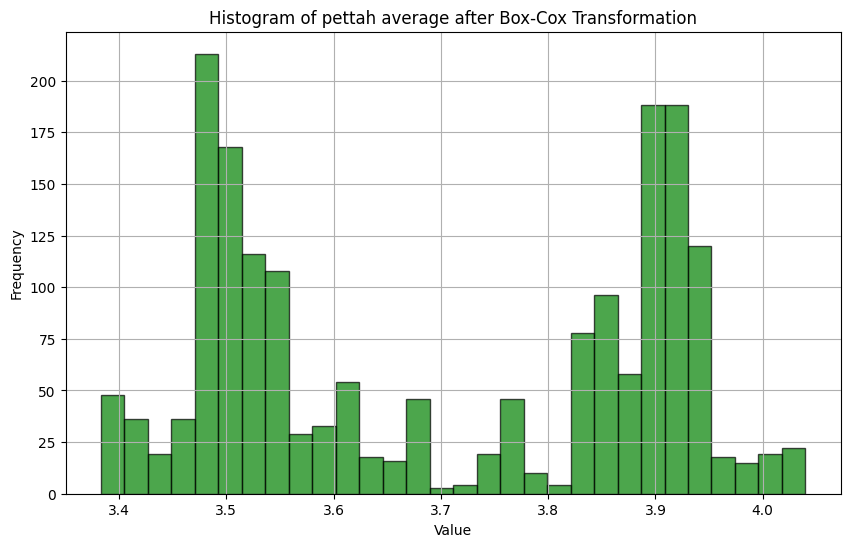

In [342]:
plt.figure(figsize=(10, 6))  # Optional: set the figure size
plt.hist(filtered_df['pettah_average'], bins=30, alpha=0.7, color='g', edgecolor='black')
plt.title('Histogram of pettah average after Box-Cox Transformation')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)  # Optional: Add a grid
plt.show()

## Data Scaling

### Min-Max Scaling

In [343]:
from sklearn.preprocessing import MinMaxScaler

# # convert date column to index
# filtered_df.set_index('date', inplace=True)

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(filtered_df)

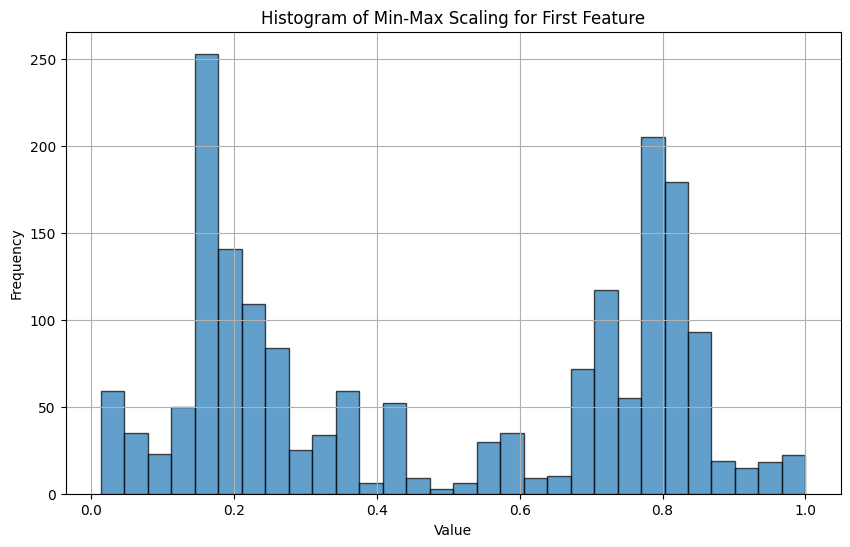

In [361]:
import matplotlib.pyplot as plt

# Plot histogram for the first feature only
plt.figure(figsize=(10, 6))
plt.hist(scaled_data[:, 0], bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of Min-Max Scaling for First Feature')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


## Remove the Zero Values in the Scaled_df

In [345]:
# Identify rows that have any '0' values
rows_with_zeros = (scaled_data == 0).any(axis=1)

# Filter out those rows (keep only rows without '0' values)
scaled_data = scaled_data[~rows_with_zeros]

## Train / Test Split 

## 7 Day Forecast Sequence Creation

In [346]:
import numpy as np

# Assuming `date_df` is your original DataFrame with the date index and scaled data
date_index = filtered_df.index  # Extract date index for tracking

# Define sequence length and forecast horizon
sequence_length = 30  # Number of time steps in each input sequence
forecast_horizon = 7  # Number of days to predict
num_features = scaled_data.shape[1]  # Total number of features

# Create sequences, labels, and corresponding dates for each sequence
sequences = []
labels = []
forecast_dates = []

for i in range(len(scaled_data) - sequence_length - forecast_horizon + 1):
    # Input sequence for 30 days
    seq = scaled_data[i:i + sequence_length]
    
    # Label (next 7 days of values)
    label = scaled_data[i + sequence_length:i + sequence_length + forecast_horizon, 0]  # Use only the first feature for labels

    # Corresponding dates for the forecast period
    forecast_date_range = date_index[i + sequence_length:i + sequence_length + forecast_horizon]
    
    # Append to lists
    sequences.append(seq)
    labels.append(label)
    forecast_dates.append(forecast_date_range)

# Convert to numpy arrays
sequences = np.array(sequences)
labels = np.array(labels)

# Split into train and test sets
train_size = int(0.8 * len(sequences))
train_x, test_x = sequences[:train_size], sequences[train_size:]
train_y, test_y = labels[:train_size], labels[train_size:]
train_dates, test_dates = forecast_dates[:train_size], forecast_dates[train_size:]

print("Train X shape:", train_x.shape)  # Expected: (samples, 30, num_features)
print("Train Y shape:", train_y.shape)  # Expected: (samples, 7)
print("Test X shape:", test_x.shape)
print("Test Y shape:", test_y.shape)
print("Example forecast dates for the first test sample:", test_dates[0])


Train X shape: (1432, 30, 1)
Train Y shape: (1432, 7)
Test X shape: (359, 30, 1)
Test Y shape: (359, 7)
Example forecast dates for the first test sample: DatetimeIndex(['2023-06-01', '2023-06-02', '2023-06-03', '2023-06-04',
               '2023-06-05', '2023-06-06', '2023-06-07'],
              dtype='datetime64[ns]', name='date', freq=None)


## Model-Conv1D and Bidirectional LSTM Layers

In [347]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Conv1D, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import ModelCheckpoint
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Create the LSTM model
model = Sequential()

# Add a Conv1D layer as the initial layer
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(train_x.shape[1], train_x.shape[2])))

# Add Bidirectional LSTM layers with dropout
# model.add(Bidirectional(LSTM(units=128, return_sequences=True), input_shape=(train_x.shape[1], train_x.shape[2])))
# model.add(Dropout(0.2))

model.add(Bidirectional(LSTM(units=128, return_sequences=True)))
model.add(Dropout(0.2))

model.add(Bidirectional(LSTM(units=64, return_sequences=True)))
model.add(Dropout(0.2))

model.add(Bidirectional(LSTM(units=32, return_sequences=False)))
model.add(Dropout(0.2))

# Add a dense output layer with 7 units for 7-day forecast
model.add(Dense(units=7, activation='linear'))  # Change units to 7 for 7-day forecast

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

c:\Users\VenuraP\AppData\Local\anaconda3\envs\hartipredict\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [348]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)               │ (None, 28, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_6 (Bidirectional) │ (None, 28, 256)        │       197,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 28, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_7 (Bidirectional) │ (None, 28, 128)        │       164,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 28, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_8 (Bidirectional) │ (None, 64)             │        41,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 403,911 (1.54 MB)

 Trainable params: 403,911 (1.54 MB)

 Non-trainable params: 0 (0.00 B)

### Hyperparameter Tuning

In [349]:
# # Define callbacks
# # early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# # patience = patience=5: Number of epochs to wait for improvement in validation loss before stopping. If validation loss does not improve for 5 consecutive epochs, training will stop
model_checkpoint = ModelCheckpoint('../../models/Nadu_2_prediction/7 Day Model/7day_model.keras', monitor='val_loss', save_best_only=True)

# Train the model
history = model.fit(
    train_x, train_y,
    epochs=100,
    batch_size=32,
    validation_split=0.2,  # Use part of the training data as validation
    callbacks=[model_checkpoint] # Currently, only save the best epoch validation loss to the best validation loss observed so far
)

Epoch 1/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - loss: 0.0376 - val_loss: 0.0041
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0066 - val_loss: 0.0222
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0061 - val_loss: 0.0011
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0047 - val_loss: 0.0012
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0040 - val_loss: 0.0055
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0039 - val_loss: 7.6941e-04
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0037 - val_loss: 5.9071e-04
Epoch 8/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0041 - val_loss: 8.7009e-04
Epoch 9/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0034 - val_loss: 3.3608e-04
Epoch 10/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0031 - val_loss: 0.0021
Epoch 11/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0025 - val_loss: 0.0012
Epoch 12/100
36/36 ━━━━━━━━━━━━━━━━━

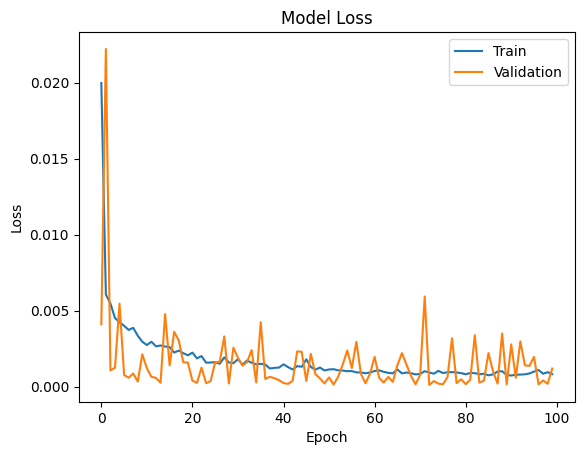

In [350]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

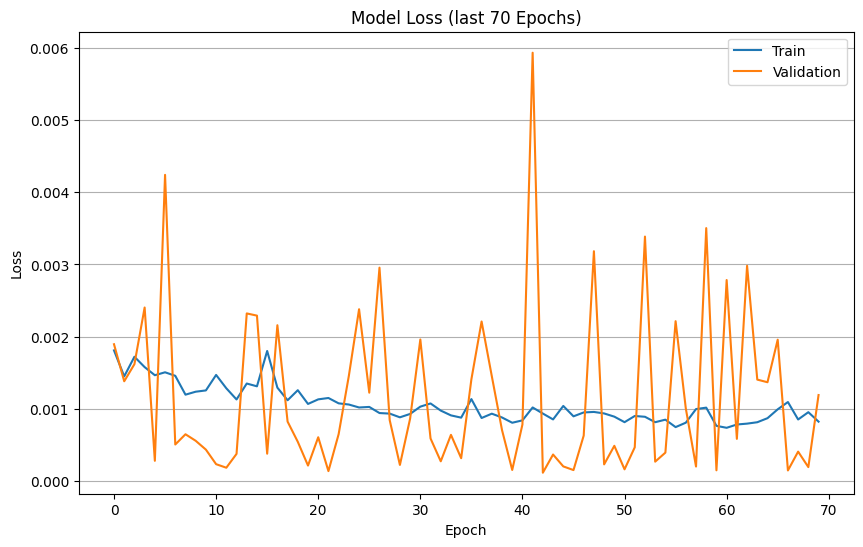

In [351]:
import matplotlib.pyplot as plt

# Get the total number of epochs
total_epochs = len(history.history['loss'])

# Define the range for the 70 epochs
last_70_epochs = range(min(70, total_epochs))

# Slice the loss and validation loss for the last 70 epochs
loss = history.history['loss'][-70:]
val_loss = history.history['val_loss'][-70:]

# Plot training & validation loss values for the last 70 epochs
plt.figure(figsize=(10, 6))
plt.plot(last_70_epochs, loss)
plt.plot(last_70_epochs, val_loss)
plt.title('Model Loss (last 70 Epochs)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

# Add horizontal grid lines
plt.grid(axis='y')

plt.show()

## Error Analysis on Training Set 

In [352]:
# High level evaluation on test set loss Evaluate the best model on the test set
import tensorflow as tf
best_model = tf.keras.models.load_model('../../models/Nadu_2_prediction//7 Day Model/7day_model.keras')

In [353]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

predictions_train = best_model.predict(train_x)

# Calculate evaluation metrics
r2 = r2_score(train_y, predictions_train)
mae = mean_absolute_error(train_y, predictions_train)
mse = mean_squared_error(train_y, predictions_train)
rmse = np.sqrt(mse)

print("Train R-squared:", r2)
print("Train Mean Absolute Error (MAE):", mae)
print("Train set Mean Squared Error (MSE):", mse)
print("Train set Root Mean Squared Error (RMSE):", rmse)

45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step
Train R-squared: 0.9960413996708811
Train Mean Absolute Error (MAE): 0.012130720529441323
Train set Mean Squared Error (MSE): 0.00032576355957870083
Train set Root Mean Squared Error (RMSE): 0.018048921285736187


## Error analysis on Test Set

In [354]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict temperatures using the trained model
predictions_test = best_model.predict(test_x)

# Calculate evaluation metrics
r2 = r2_score(test_y, predictions_test)
mae = mean_absolute_error(test_y, predictions_test)
mse = mean_squared_error(test_y, predictions_test)
rmse = np.sqrt(mse)

print("R-squared:", r2)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
R-squared: 0.9582769718997832
Mean Absolute Error (MAE): 0.007184655319134091
Mean Squared Error (MSE): 0.00011958029819176771
Root Mean Squared Error (RMSE): 0.010935277691570877


- MSE is sensitive to outliers in the data when MSE is high
- RMSE also same sensitive to lager erros but this is good since the units are same as the data ( Rs and error also Rs)

## Prediction on Test Set

In [355]:
prediction = best_model.predict(test_x)  # Shape: (num_samples, timesteps=sequence_length, features)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


## Inverse Transformation on Test set and Predictions ( Scalers -->Transformers-->Actual Prices)

In [356]:
from scipy.special import inv_boxcox

# Inverse transformation for test_y
true_prices = []
for row in test_y:
    # Reshape each row to the scaler's feature shape and inverse transform
    row_copies = np.repeat(row.reshape(-1, 1), test_x.shape[-1], axis=-1)
    # Apply inverse scaling and Box-Cox
    row_true_price = scaler.inverse_transform(row_copies)[:, 0]  # Keep only the first feature's original values min-max scaling
    row_true_price = inv_boxcox(row_true_price, lambda_value)    # Apply Box-Cox inverse
    true_prices.append(row_true_price)

# Convert list back to a numpy array
true_prices = np.array(true_prices)

# Inverse transformation for predictions
predicted_prices = []
for row in prediction:
    # Reshape each row to match the scaler's shape and inverse transform
    row_copies = np.repeat(row.reshape(-1, 1), test_x.shape[-1], axis=-1)
    # Apply inverse scaling and Box-Cox
    row_predicted_price = scaler.inverse_transform(row_copies)[:, 0] # Keep only the first feature's original values min-max scaling
    row_predicted_price = inv_boxcox(row_predicted_price, lambda_value) # Apply Box-Cox inverse
    predicted_prices.append(row_predicted_price)

# Convert list back to a numpy array
predicted_prices = np.array(predicted_prices)

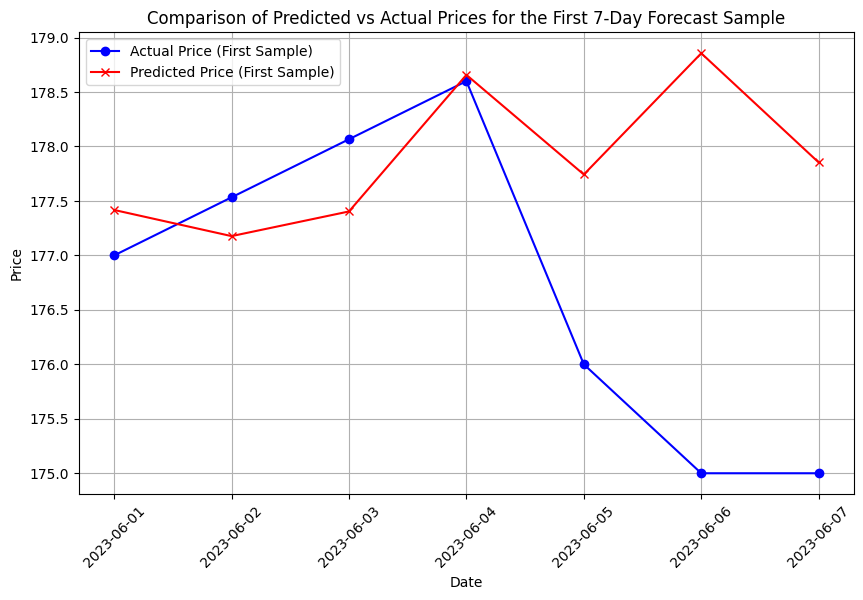

In [357]:
import matplotlib.pyplot as plt

# Assuming true_prices, predicted_prices, and test_dates are available
# and test_dates[0] holds the 7 dates corresponding to the first forecast period

# Extract the first sample (first 7-day forecast) from true and predicted arrays
sample_true = true_prices[0]
sample_pred = predicted_prices[0]

# Use actual dates for the first forecast period
forecast_dates = test_dates[0]  # Should be an array of dates with length 7

plt.figure(figsize=(10, 6))

# Plot the actual and predicted prices for the first 7-day forecast
plt.plot(forecast_dates, sample_true, label='Actual Price (First Sample)', marker='o', color='blue')
plt.plot(forecast_dates, sample_pred, label='Predicted Price (First Sample)', marker='x', color='red')

# Add labels, title, and legend
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Comparison of Predicted vs Actual Prices for the First 7-Day Forecast Sample")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate dates for better readability
plt.show()



##  Heatmap of Prediction Errors

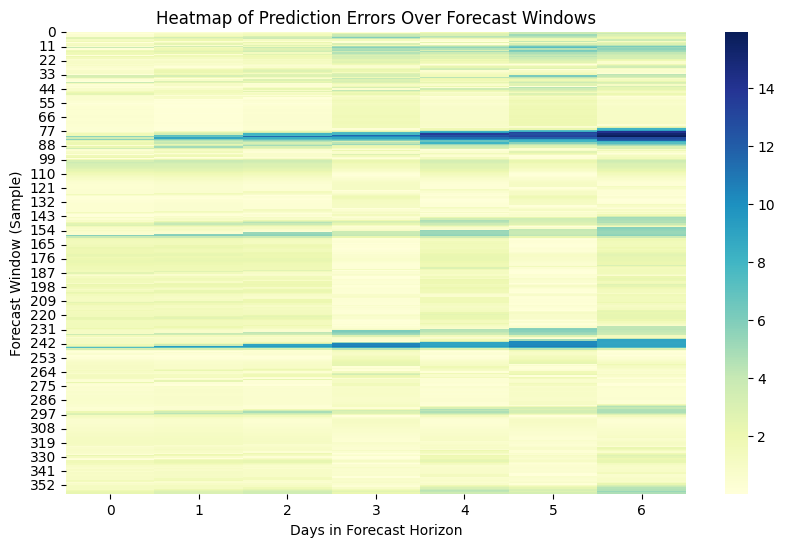

In [358]:
import seaborn as sns
import numpy as np

# Calculate error matrix
errors = np.abs(true_prices - predicted_prices)  # Absolute error for each day in the forecast

plt.figure(figsize=(10, 6))
sns.heatmap(errors, cmap="YlGnBu", annot=False)
plt.xlabel("Days in Forecast Horizon")
plt.ylabel("Forecast Window (Sample)")
plt.title("Heatmap of Prediction Errors Over Forecast Windows")
plt.show()


## Scatter Plot of Predicted vs Actual Values

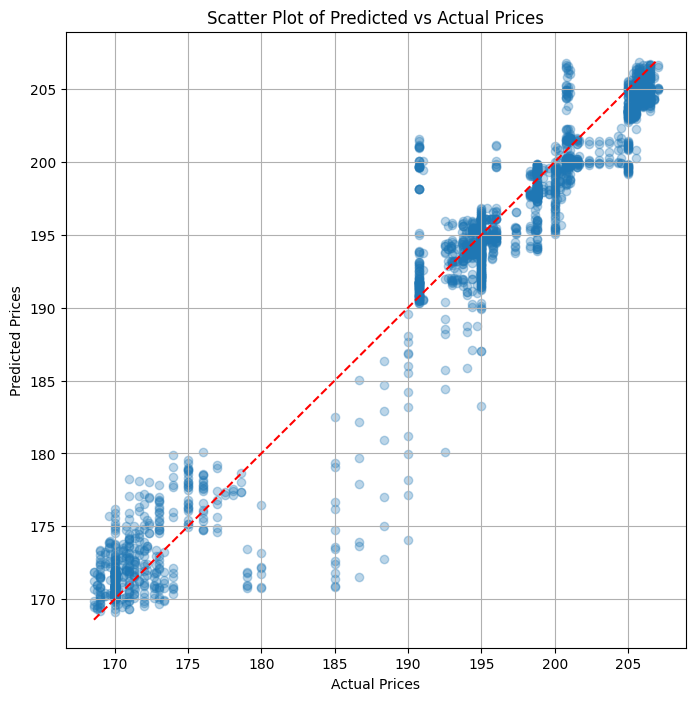

In [359]:
plt.figure(figsize=(8, 8))
plt.scatter(true_prices.flatten(), predicted_prices.flatten(), alpha=0.3)
plt.plot([min(true_prices.flatten()), max(true_prices.flatten())], [min(true_prices.flatten()), max(true_prices.flatten())], 'r--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Scatter Plot of Predicted vs Actual Prices")
plt.grid(True)
plt.show()


##  Mean Absolute Error (MAE) or Mean Squared Error (MSE) Over Time

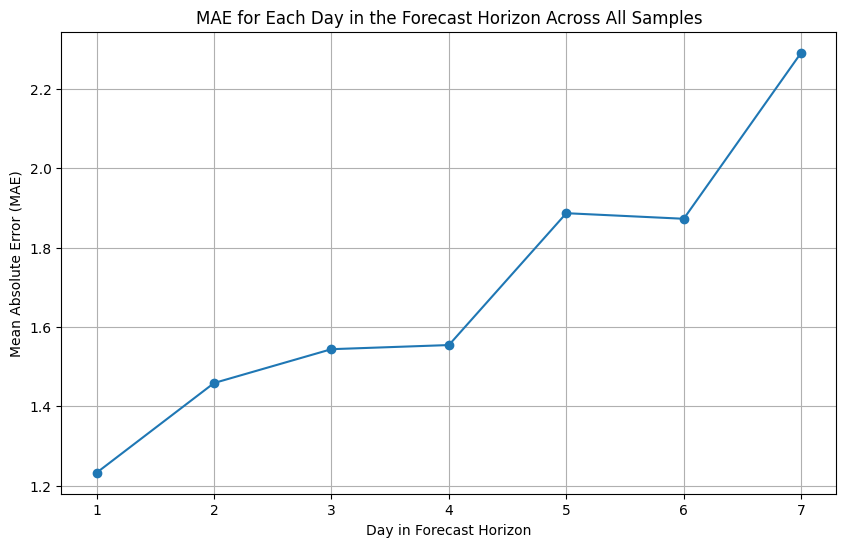

In [360]:
from sklearn.metrics import mean_absolute_error

# Calculate MAE for each day in the 7-day forecast window across all samples
mae_per_day = [mean_absolute_error(true_prices[:, i], predicted_prices[:, i]) for i in range(7)]

plt.figure(figsize=(10, 6))
plt.plot(range(1, 8), mae_per_day, marker='o')
plt.xlabel("Day in Forecast Horizon")
plt.ylabel("Mean Absolute Error (MAE)")
plt.title("MAE for Each Day in the Forecast Horizon Across All Samples")
plt.grid(True)
plt.show()
